In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test1.csv")

In [3]:
train

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


In [4]:
test

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011
...,...
115,08-01-2020
116,09-01-2020
117,10-01-2020
118,11-01-2020


In [5]:
train.describe()

,Avg_sunspot_count
count,3144.000000
mean,82.994593
std,68.436447
min,0.000000
25%,25.000000
50%,69.000000
75%,125.000000
max,398.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3144 non-null   object
 1   Avg_sunspot_count  3144 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.2+ KB


In [7]:
train.duplicated().sum()

0

In [8]:
train["Month"] = pd.to_datetime(train["Month"], format='%m-%d-%Y') 

In [9]:
train["Month"]

0      1749-01-01
1      1749-02-01
2      1749-03-01
3      1749-04-01
4      1749-05-01
          ...    
3139   2010-08-01
3140   2010-09-01
3141   2010-10-01
3142   2010-11-01
3143   2010-12-01
Name: Month, Length: 3144, dtype: datetime64[ns]

In [10]:
train.set_index(train["Month"], inplace = True)
test.set_index(test["Month"], inplace = True)

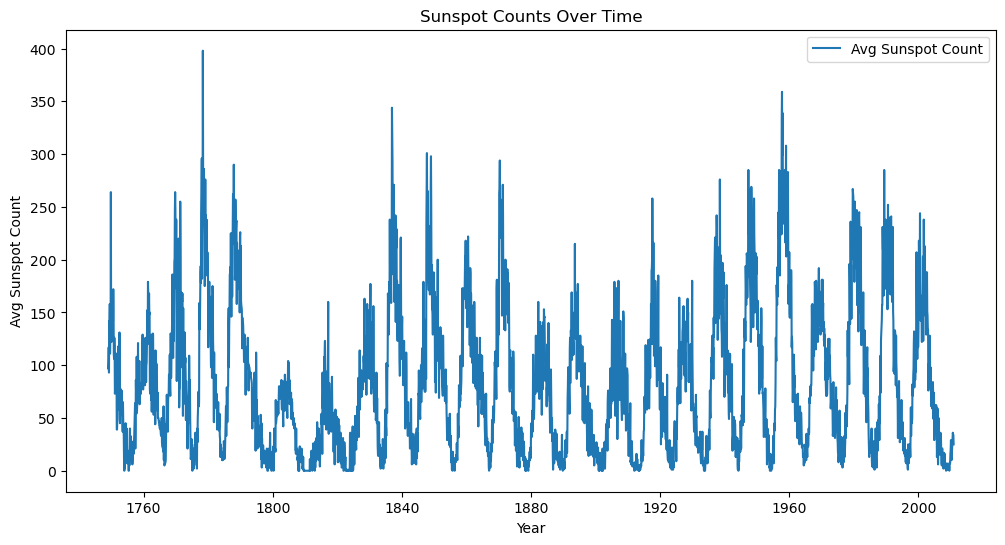

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Avg_sunspot_count'], label='Avg Sunspot Count')
plt.title('Sunspot Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Sunspot Count')
plt.legend()
plt.show()

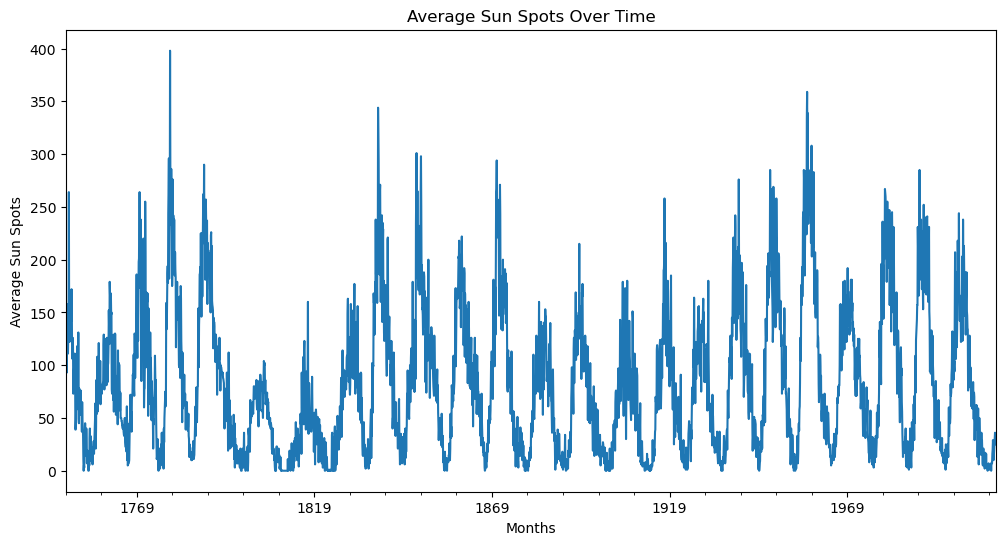

In [12]:
plt.figure(figsize=(12, 6))
train['Avg_sunspot_count'].plot()
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

In [13]:
train["Avg_sunspot_count"].mean()

82.99459287531806

In [14]:
train["Avg_sunspot_count"].median()

69.0

In [15]:
train.isna().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [16]:
max(train["Avg_sunspot_count"])

398

In [17]:
min(train["Avg_sunspot_count"])

0

In [18]:
train["Avg_sunspot_count"].var()

4683.547218606076

In [19]:
train["Avg_sunspot_count"].std()

68.4364465661834

In [20]:
df_yearly = train['Avg_sunspot_count'].resample('Y').mean()

In [21]:
df_yearly

Month
1749-12-31    135.000000
1750-12-31    139.166667
1751-12-31     79.666667
1752-12-31     79.750000
1753-12-31     51.083333
                 ...    
2006-12-31     24.666667
2007-12-31     12.583333
2008-12-31      4.250000
2009-12-31      4.750000
2010-12-31     25.000000
Freq: A-DEC, Name: Avg_sunspot_count, Length: 262, dtype: float64

In [22]:
df_yearly.max()

268.9166666666667

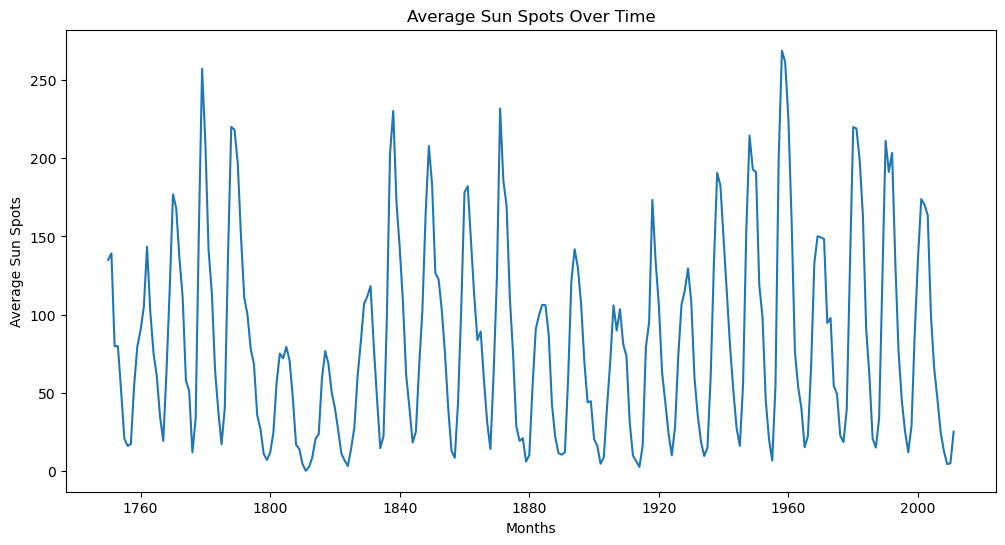

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly)
plt.xlabel('Months')
plt.ylabel('Average Sun Spots')
plt.title('Average Sun Spots Over Time')
plt.show()

# Checking if data is stationary or not 


In [24]:
rolmean = train.rolling(window = 12).mean()
rolstd = train.rolling(window = 12).std()

C:\Users\Shruti\AppData\Local\Temp\ipykernel_31076\2563208802.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolmean = train.rolling(window = 12).mean()
C:\Users\Shruti\AppData\Local\Temp\ipykernel_31076\2563208802.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolstd = train.rolling(window = 12).std()


In [25]:
rolmean

,Avg_sunspot_count
Month,
1749-01-01,NaN
1749-02-01,NaN
1749-03-01,NaN
1749-04-01,NaN
1749-05-01,NaN
...,...
2010-08-01,17.416667
2010-09-01,19.833333
2010-10-01,22.000000


In [26]:
rolstd

,Avg_sunspot_count
Month,
1749-01-01,NaN
1749-02-01,NaN
1749-03-01,NaN
1749-04-01,NaN
1749-05-01,NaN
...,...
2010-08-01,8.404094
2010-09-01,9.262175
2010-10-01,9.283416


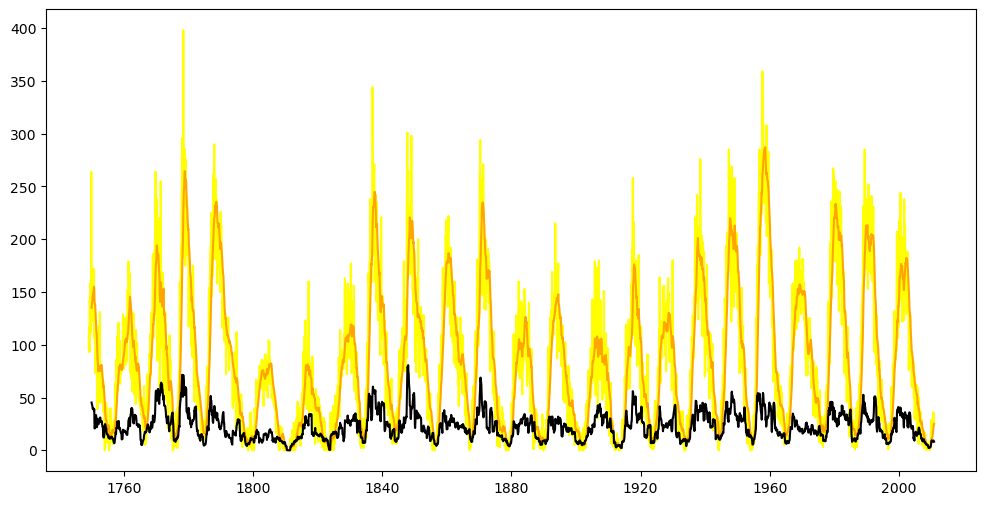

In [27]:
plt.figure(figsize = (12,6))
org = plt.plot(train["Avg_sunspot_count"], color = "yellow", label = "Original")
mea =plt.plot(rolmean, color = "orange", label = "Rolling mean")
s = plt.plot(rolstd, color = "black", label = "Rolling std")

In [31]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Avg_sunspot_count):
    result=adfuller(Avg_sunspot_count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [32]:
adfuller_test(train['Avg_sunspot_count'])

ADF Test Statistic : -10.390308589912836
p-value : 2.0290768019122553e-18
#Lags Used : 28
Number of Observations Used : 3115
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


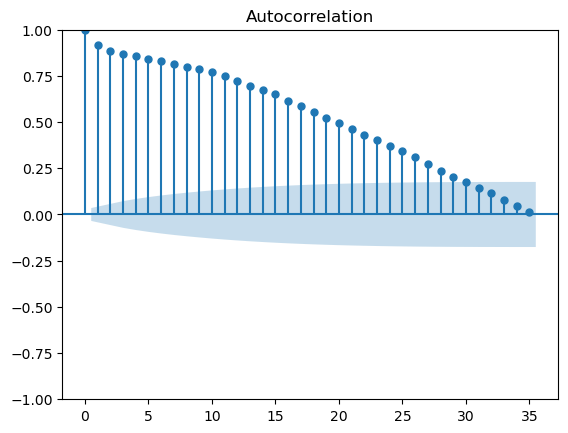

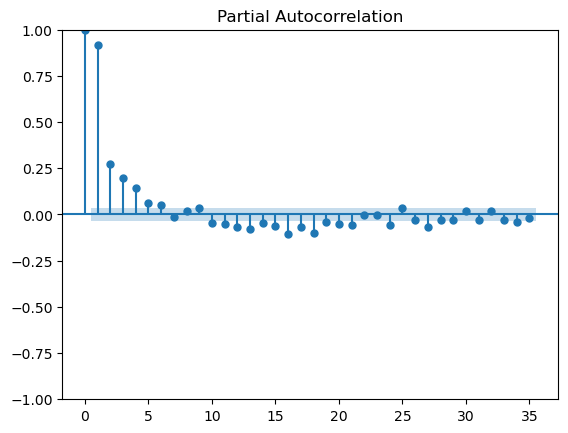

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['Avg_sunspot_count'])
plot_pacf(train['Avg_sunspot_count'])
plt.show()


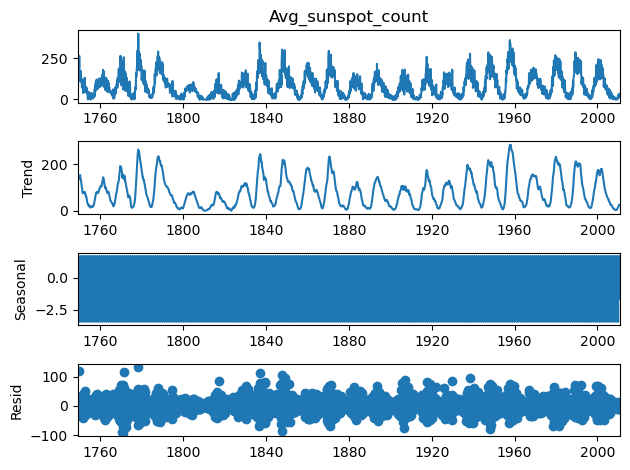

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train['Avg_sunspot_count'], model='additive', period=12)
result.plot()
plt.show()


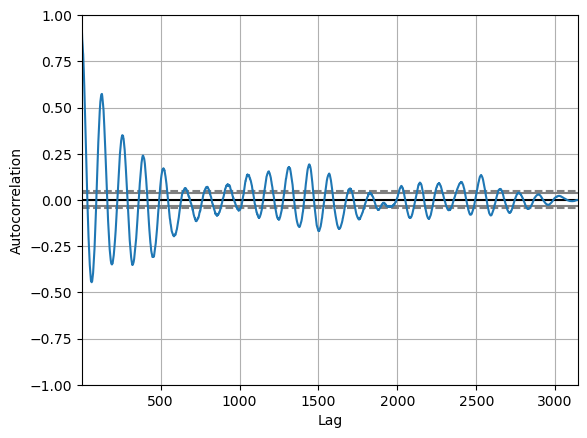

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Avg_sunspot_count'])
plt.show()

# ARIMA model

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Avg_sunspot_count'], order=(7, 0, 35))
model_fit = model.fit()


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.41655039112196


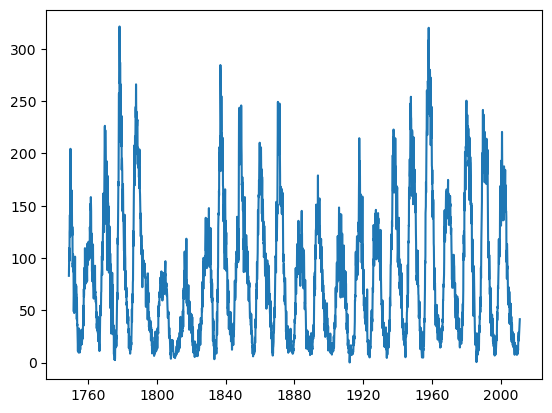

In [36]:
from sklearn.metrics import mean_squared_error
pred1 = model_fit.predict()
plt.plot(pred1)

rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], pred1))

print(f'Root Mean Squared Error (RMSE): {rmse}')


In [37]:
start_date = test.index[0]
end_date = test.index[-1]
pred = model_fit.predict(start = start_date, end = end_date)
pred

2011-01-01    35.177340
2011-02-01    40.411136
2011-03-01    43.654106
2011-04-01    46.067627
2011-05-01    51.263532
                ...    
2020-08-01    61.514023
2020-09-01    62.026198
2020-10-01    62.584529
2020-11-01    63.188927
2020-12-01    63.835581
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

In [38]:
test["Avg_sunspot_count"] = pred

In [39]:
test

,Month,Avg_sunspot_count
Month,,
01-01-2011,01-01-2011,35.177340
02-01-2011,02-01-2011,40.411136
03-01-2011,03-01-2011,43.654106
04-01-2011,04-01-2011,46.067627
05-01-2011,05-01-2011,51.263532
...,...,...
08-01-2020,08-01-2020,61.514023
09-01-2020,09-01-2020,62.026198
10-01-2020,10-01-2020,62.584529


<AxesSubplot:xlabel='Month'>

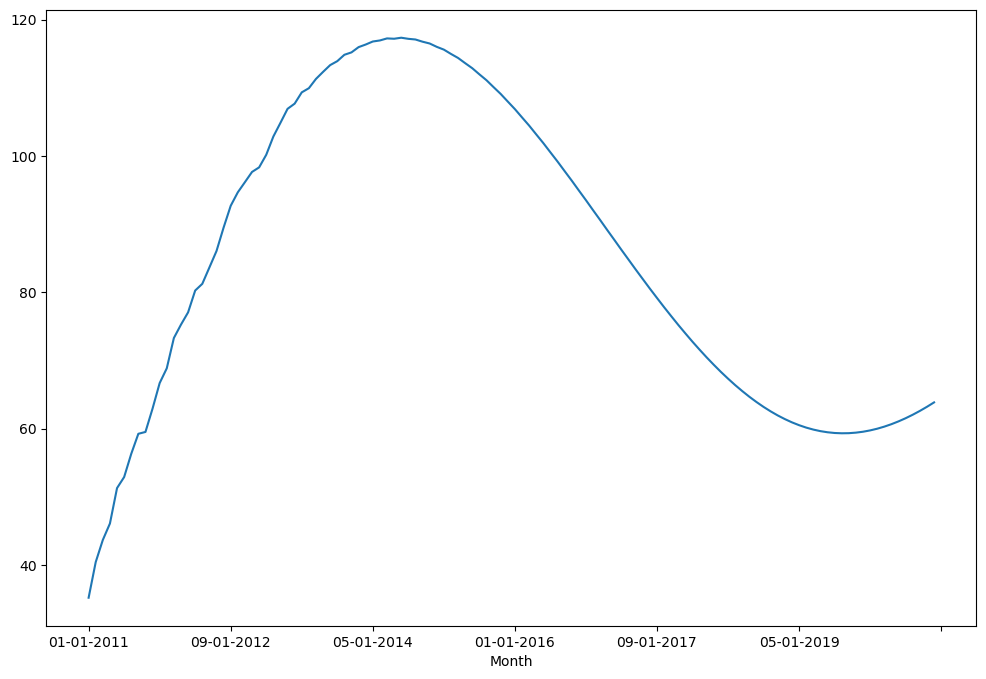

In [40]:
test["Avg_sunspot_count"].plot(figsize=(12,8))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.40403972420458


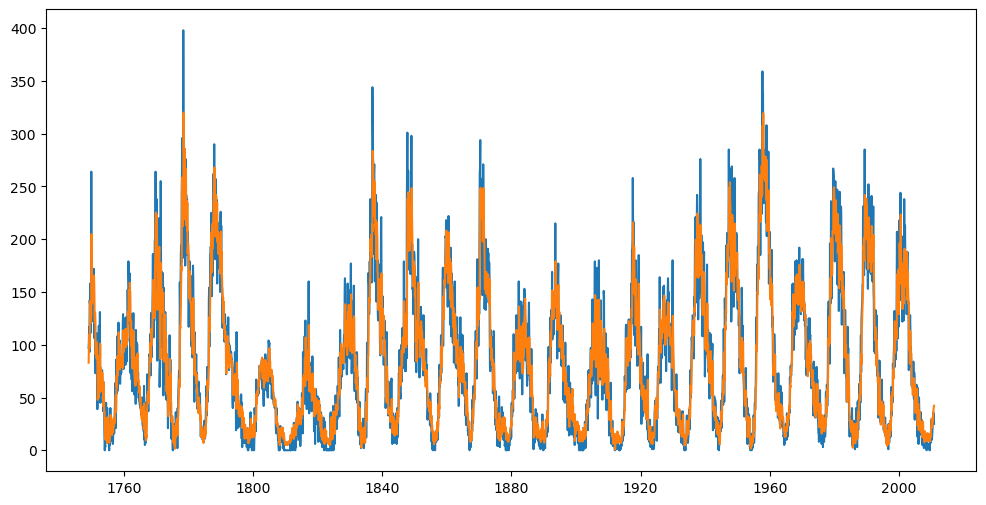

In [56]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Avg_sunspot_count'], order=(10, 0, 35))
model_fit = model.fit()
train["model_pred"] = model_fit.predict()
plt.figure(figsize = (12,6))
plt.plot(train[['Avg_sunspot_count', "model_pred"]])
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["model_pred"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')



In [57]:
start_date = test.index[0]
end_date = test.index[-1]
pred = model_fit.predict(start = start_date, end = end_date)
pred

2011-01-01    36.105577
2011-02-01    41.606681
2011-03-01    44.722996
2011-04-01    47.731254
2011-05-01    53.567991
                ...    
2020-08-01    62.217956
2020-09-01    63.112154
2020-10-01    63.590111
2020-11-01    64.581885
2020-12-01    65.134038
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

<AxesSubplot:>

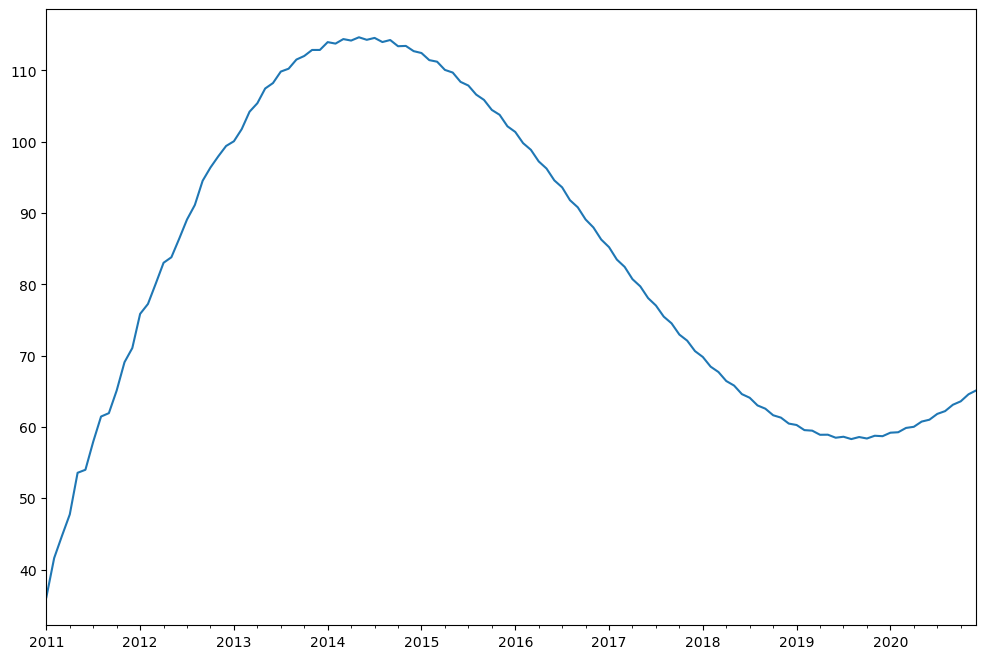

In [60]:
pred.plot(figsize=(12,8))

# SARIMAX

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
model_SARIMA=SARIMAX(train['Avg_sunspot_count'],order=(10,0,35),seasonal_order=(1,0,0,12))

C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shruti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 24.40403972420458


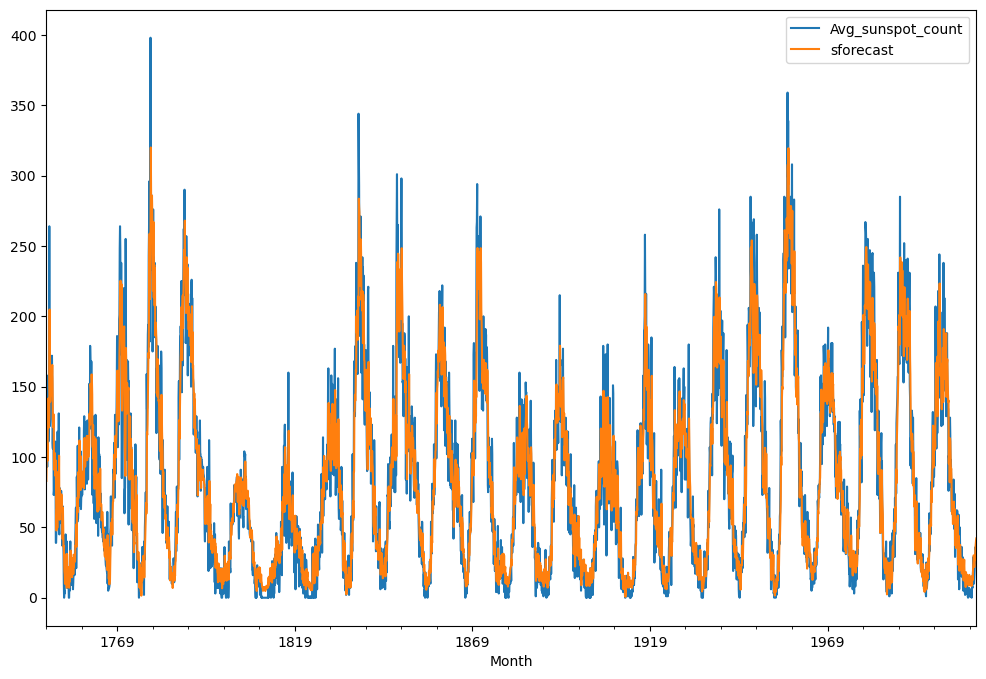

In [50]:
model_SARIMA_fit=model_SARIMA.fit()
train["sforecast"] = model_fit.predict()
train[['Avg_sunspot_count','sforecast']].plot(figsize=(12,8))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(train['Avg_sunspot_count'], train["sforecast"]))

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [51]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                     Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(10, 0, 35)x(1, 0, [], 12)   Log Likelihood              -14561.570
Date:                               Thu, 12 Sep 2024   AIC                          29217.140
Time:                                       13:36:37   BIC                          29501.643
Sample:                                   01-01-1749   HQIC                         29319.231
                                        - 12-01-2010                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0175      0.516      0.034      0.973      -0.993       1.029
ar.L2         -0.1074      0.459     -0.234      0.815      -1.008       0.793
ar.L3          0.0744      0.282      0.263      0.792      -0.479       0.628
ar.L4         -0.0459      0.278     -0.165      0.869      -0.591       0.499
ar.L5          0.0103      0.260      0.040      0.968      -0.499       0.520
ar.L6          0.0229      0.247      0.093      0.926      -0.462       0.508
ar.L7          0.1618      0.247      0.654      0.513      -0.323       0.647
ar.L8          0.2242      0.254      0.882      0.378      -0.274       0.722
ar.L9          0.1413      0.285      0.496      0.620      -0.417       0.699
ar.L10         0.4050      0.275      1.472      0.141      -0.134       0.945
ma.L1          0.5447      0.516      1.056      0.291      -0.466       1.556
ma.L2          0.5192      0.628      0.826      0.409      -0.712       1.751
ma.L3          0.3623      0.476      0.762      0.446      -0.570       1.295
ma.L4          0.4553      0.292      1.557      0.119      -0.118       1.028
ma.L5          0.4226      0.302      1.400      0.162      -0.169       1.014
ma.L6          0.4309      0.409      1.055      0.292      -0.370       1.232
ma.L7          0.2497      0.457      0.546      0.585      -0.647       1.146
ma.L8          0.1032      0.370      0.279      0.780      -0.622       0.828
ma.L9          0.1658      0.322      0.514      0.607      -0.466       0.798
ma.L10        -0.1240      0.331     -0.375      0.708      -0.772       0.524
ma.L11         0.0943      0.298      0.316      0.752      -0.490       0.679
ma.L12        -0.6946      0.320     -2.171      0.030      -1.322      -0.068
ma.L13        -0.3021      0.406     -0.744      0.457      -1.098       0.493
ma.L14        -0.2641      0.459     -0.575      0.565      -1.165       0.636
ma.L15        -0.0848      0.349     -0.243      0.808      -0.768       0.599
ma.L16        -0.2113      0.291     -0.725      0.468      -0.782       0.360
ma.L17        -0.1757      0.249     -0.706      0.480      -0.664       0.312
ma.L18        -0.2396      0.269     -0.892      0.372      -0.766       0.287
ma.L19        -0.1185      0.271     -0.437      0.662      -0.649       0.412
ma.L20        -0.0047      0.223     -0.021      0.983      -0.442       0.433
ma.L21        -0.1128      0.228     -0.495      0.621      -0.560       0.334
ma.L22         0.1253      0.209      0.599      0.549      -0.285       0.535
ma.L23        -0.0291      0.136     -0.215      0.830      -0.295       0.237
ma.L24        -0.1498      0.135     -1.110      0.267      -0.414       0.115
ma.L25        -0.1327      0.127     -1.041      0.298      -0.382       0.117
ma.L26        -0.1325      0.110     -1.204      0.229      -0.348       0.083
ma.L27        -0.2022    

In [52]:
start_date = test.index[0]
end_date = test.index[-1]
pred_Sarima=model_SARIMA_fit.predict(start=start_date,end= end_date, steps = 120)

In [53]:
test["sarima_pred"] = pred_Sarima

<AxesSubplot:xlabel='Month'>

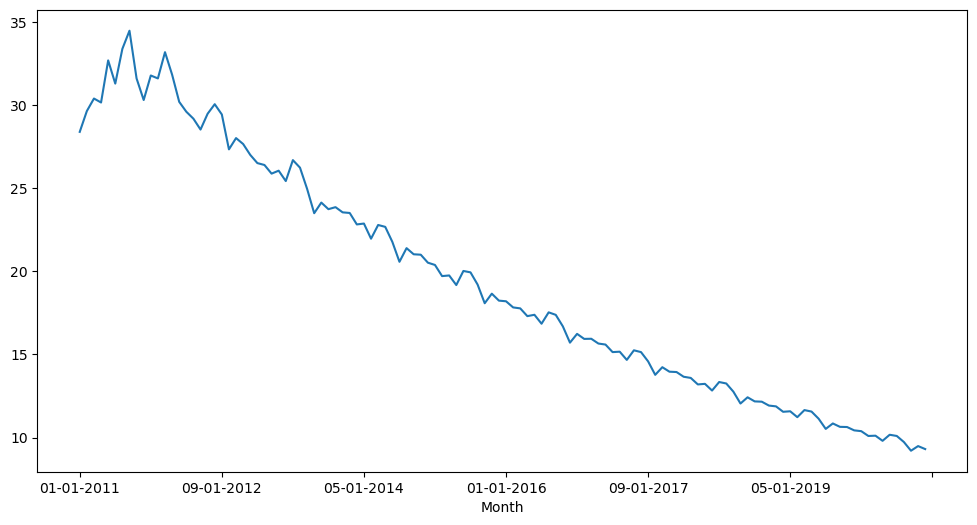

In [54]:
test["sarima_pred"].plot(figsize = (12,6))

<AxesSubplot:xlabel='Month'>

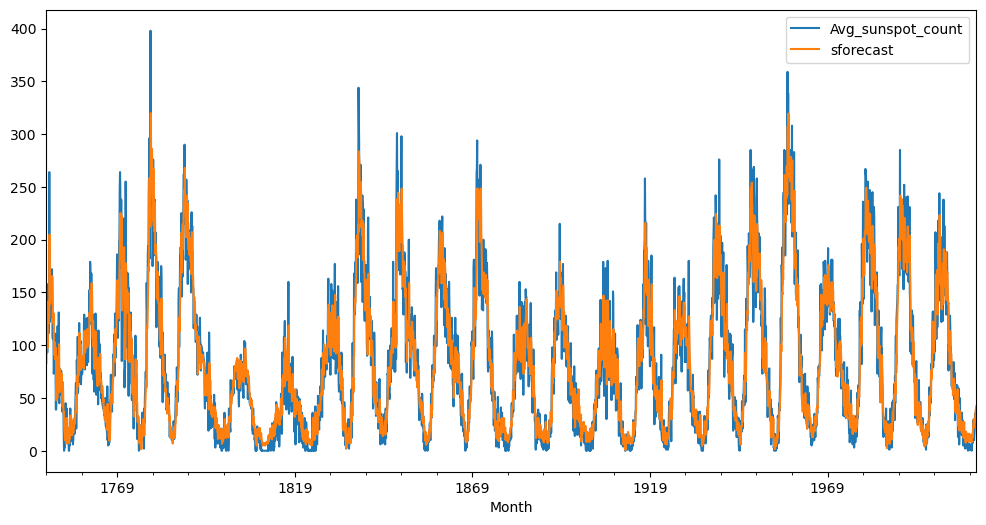

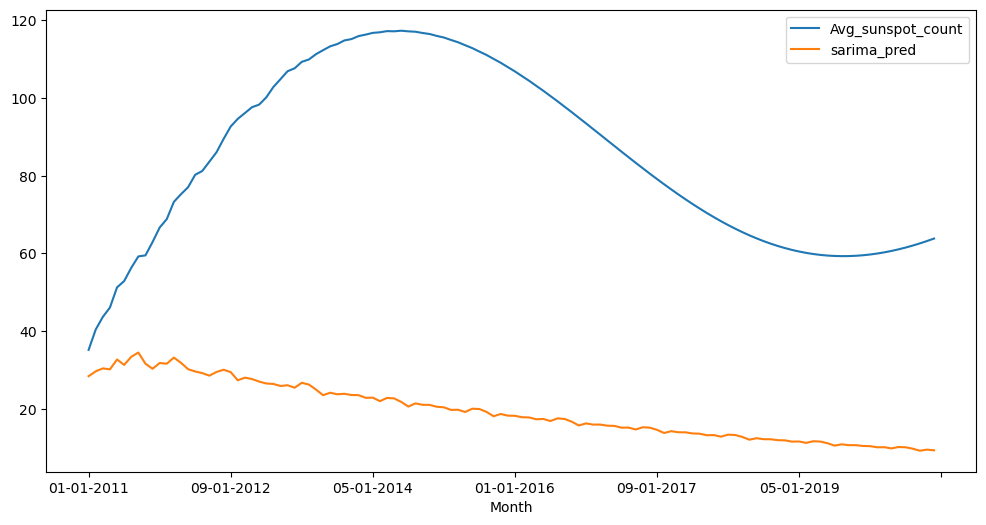

In [55]:
train[['Avg_sunspot_count', 'sforecast']].plot(figsize = (12,6))
test[['Avg_sunspot_count', 'sarima_pred']].plot(figsize = (12,6))
